In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [127]:
collision_data = pd.read_csv("C:/Users/erueb/dev/python-projects/SIFCodiingChallenge/NYPD_Data.csv")

In [128]:
# collision_data.columns.tolist()
collision_data.keys()

Index(['Unnamed: 0', 'DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'UNIQUE KEY', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [129]:
# collision_data

,Unnamed: 0,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,1368854,06/07/2013,13:23,STATEN ISLAND,10309.0,40.525387,-74.239264,"(40.5253868, -74.239264)",ARTHUR KILL ROAD,NORTH BRIDGE STREET,...,Unspecified,NaN,NaN,NaN,302810,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
1,568233,02/20/2017,15:15,NaN,NaN,40.804348,-73.911660,"(40.804348, -73.91166)",EAST 138 STREET,NaN,...,Unspecified,NaN,NaN,NaN,3619170,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
2,81705,04/04/2019,10:55,NaN,NaN,40.769897,-73.913440,"(40.769897, -73.91344)",36 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4110689,Taxi,Bike,NaN,NaN,NaN
3,1389954,05/03/2013,10:00,STATEN ISLAND,10301,40.643417,-74.081484,"(40.6434168, -74.0814836)",DANIEL LOW TERRACE,VINE STREET,...,Unspecified,NaN,NaN,NaN,288023,PASSENGER VEHICLE,UNKNOWN,NaN,NaN,NaN
4,611083,12/09/2016,7:30,QUEENS,11434.0,40.667934,-73.775090,"(40.667934, -73.77509)",NaN,NaN,...,Unspecified,NaN,NaN,NaN,3576846,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
5,1061448,12/01/2014,9:45,MANHATTAN,10018,40.759527,-73.999242,"(40.7595273, -73.999242)",11 AVENUE,WEST 40 STREET,...,Unspecified,NaN,NaN,NaN,3129073,PASSENGER VEHICLE,SMALL COM VEH(4 TIRES),NaN,NaN,NaN
6,1542451,07/23/2012,4:00,BROOKLYN,11214,40.603847,-74.002629,"(40.6038466, -74.0026289)",19 AVENUE,BENSON AVENUE,...,Unspecified,Unspecified,NaN,NaN,121572,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN
7,12678,07/27/2019,11:00,NaN,NaN,40.763126,-73.831250,"(40.763126, -73.83125)",NORTHERN BOULEVARD,NaN,...,Unspecified,NaN,NaN,NaN,4177946,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
8,1100313,09/25/2014,18:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Unspecified,NaN,NaN,NaN,2919581,OTHER,OTHER,NaN,NaN,NaN
9,88321,03/23/2019,11:00,NaN,NaN,40.854057,-73.898315,"(40.854057, -73.898315)",FOLIN STREET,NaN,...,NaN,NaN,NaN,NaN,4101666,Sedan,NaN,NaN,NaN,NaN


['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND']
[9618, 21579, 16976, 18534, 3042]


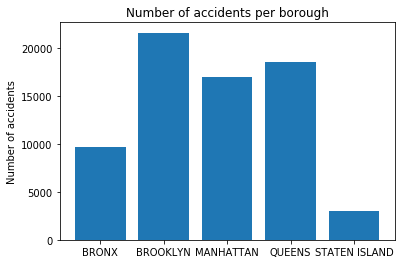

Number of recorded accidents with no borough given: 30251


In [130]:
"""Plotting number of accidents by borough"""

boroughs = list(collision_data.BOROUGH.dropna().unique())
boroughs.sort()
print(boroughs)
accident_counts = []
for borough in boroughs:
    accident_counts.append(len(collision_data[collision_data.BOROUGH == borough]))
    
print(accident_counts)
y_pos = np.arange(len(boroughs))

plt.bar(y_pos, accident_counts, align='center')
plt.xticks(y_pos, boroughs)
plt.ylabel('Number of accidents')
plt.title('Number of accidents per borough')
plt.show()
print('Number of recorded accidents with no borough given: {}'.format(collision_data.BOROUGH.size - collision_data.BOROUGH.dropna().size))


In [131]:
"""Deaths only occurred in 105 out of 100,000 recorded accidents"""
num_deaths_series = collision_data['NUMBER OF PERSONS KILLED']
num_deaths_series = num_deaths_series[num_deaths_series > 0]
num_deaths_series

1481     1.0
1979     1.0
2702     1.0
2957     1.0
3527     1.0
5205     1.0
5684     1.0
5802     1.0
7280     1.0
7362     1.0
8076     1.0
8190     1.0
10111    1.0
12841    1.0
17152    1.0
18460    1.0
20299    1.0
22127    1.0
22313    1.0
24581    1.0
25105    1.0
26133    1.0
26764    1.0
27113    1.0
27194    1.0
28147    1.0
28421    1.0
28495    1.0
28941    1.0
29338    1.0
        ... 
72308    1.0
73722    1.0
73965    1.0
74500    1.0
75579    1.0
76178    1.0
78576    1.0
78775    1.0
78788    1.0
79481    1.0
81580    1.0
82244    1.0
84805    1.0
86071    1.0
86727    1.0
87613    1.0
87641    1.0
90052    1.0
90214    1.0
93192    1.0
93813    1.0
95061    1.0
95648    1.0
98000    1.0
98232    1.0
98322    1.0
98349    1.0
98575    1.0
98694    1.0
99024    1.0
Name: NUMBER OF PERSONS KILLED, Length: 105, dtype: float64